<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Plotting (Good)</span></div>

# What to expect in this chapter

# 1 Some nomenclature

# 2 Comparing the two ‘dialects’

dialet: object oriented (OO) interface vs pyplot interface

In [2]:
from matplotlib import pyplot as plt
import numpy as np

In [14]:
x = np.linspace(-np.pi, np.pi, num=100)
cos_x = np.cos(x)
sin_x = np.sin(x)

### pyplot Interface

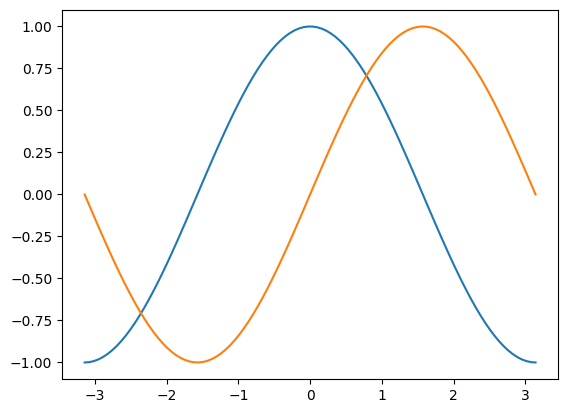

In [17]:
plt.plot(x, cos_x, label = 'cos x')
plt.plot (x, sin_x, label = 'sin x')

### OO Interface

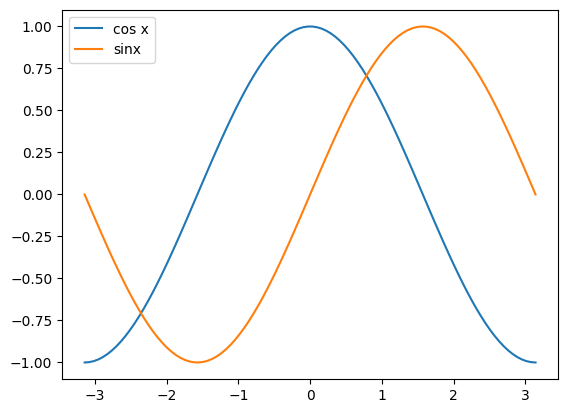

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(x, cos_x, label ='cos x')
ax.plot(x, sin_x, label ='sinx')
plt.legend()

# 3 What is OO ax, really?

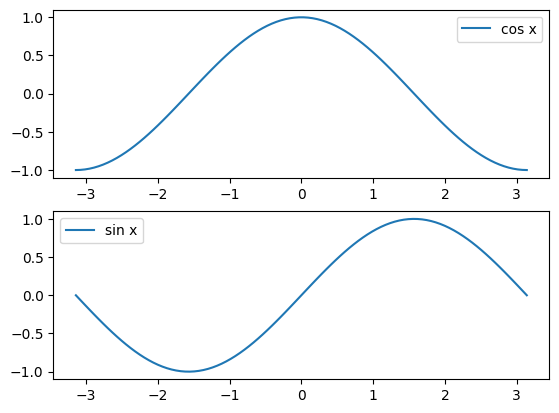

In [15]:
fig, ax = plt.subplots(nrows=2, ncols=1)

ax[0].plot(x, cos_x, label='cos x')
ax[1].plot(x, sin_x, label='sin x')

ax[0].legend()
ax[1].legend()

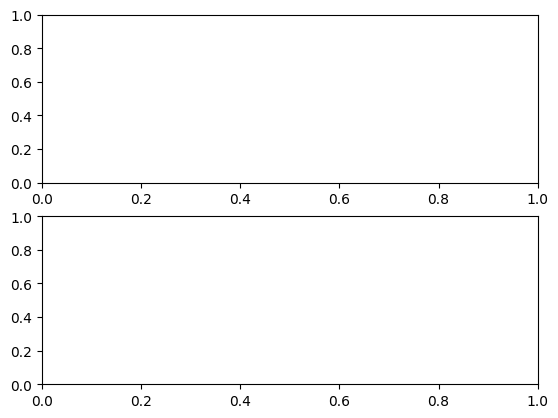

In [22]:
fig, ax = plt.subplots(ncols=1, nrows=2) # asking for 2 rows and 1 column

In [23]:
type(ax)

numpy.ndarray

In [25]:
ax.shape #size of ax

(2,)

In [27]:
type(ax[0])

matplotlib.axes._axes.Axes

# 4 A complete OO example

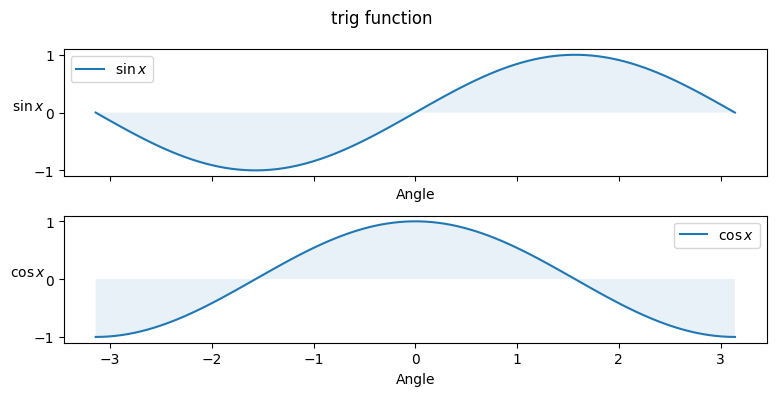

In [48]:
fig, ax = plt.subplots(
    nrows =2,
    figsize =(8,4),
    sharex = 'col',
    sharey = 'row',
)

my_sin= ax[0]
my_cos= ax[1]

my_sin.plot (x, sin_x, label = '$\\sin x$')
my_sin.legend()

my_cos.plot(x, cos_x, label = '$\\cos x$')
my_cos.legend()

my_sin.fill_between(x, 0, sin_x, alpha=.1)
my_cos.fill_between(x, 0, cos_x, alpha=.1)

plt.suptitle ('trig function')

my_sin.set_xlabel ('Angle')
my_cos.set_xlabel ('Angle')

my_sin.set_ylabel ('$\\sin x$', rotation=0)
my_cos.set_ylabel ('$\\cos x$', rotation=0)

plt.tight_layout()



# 5 Multiple rows and columns

### Using ax

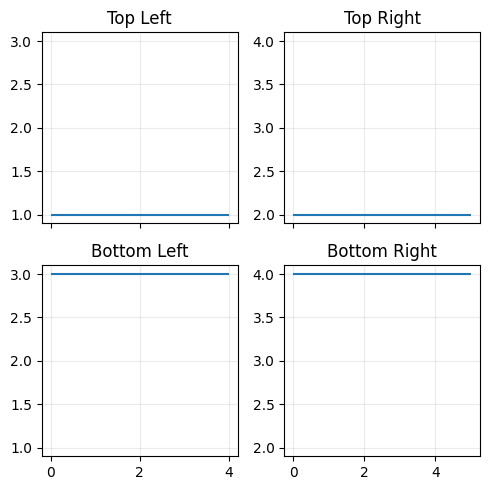

In [3]:
fig, ax = plt.subplots(nrows=2, ncols=2,
                       figsize=(5, 5),
                       sharex='col', sharey='col')

# Some variables to access the axes and improve readabilty
top_left, top_right, bottom_left, bottom_right = ax.flatten()

top_left.set_title('Top Left')
top_right.set_title('Top Right')
bottom_left.set_title('Bottom Left')
bottom_right.set_title('Bottom Right')

top_left.hlines(y=1, xmin=0, xmax=4)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=4)
bottom_right.hlines(y=4, xmin=0, xmax=5)

for a in ax.flatten():
    a.grid(alpha=.25)

plt.tight_layout()

## 5.1 Sharing axes

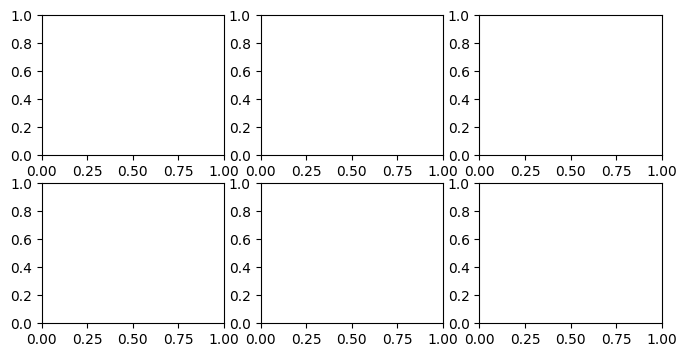

In [53]:
fig, ax = plt.subplots(
    nrows=2, ncols=3,
    figsize = (8,4),
)

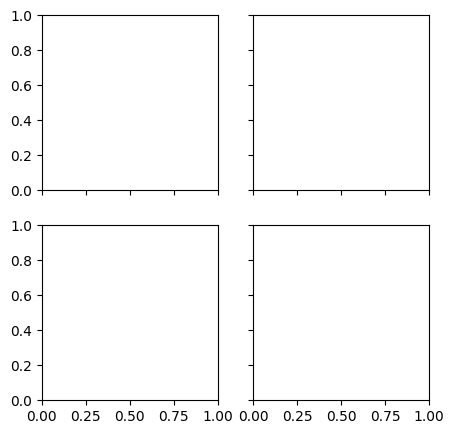

In [7]:
fig, ax = plt.subplots(
    nrows=2, ncols=2,
    figsize=(5, 5),
    sharex=True, sharey='row'
)

In [17]:
fig, ax = plt.subplots(
    nrows=2, ncols=3,
    figsize = (8,4),
)
`
for row in range(2):
    for col in range (3):
        a[row, cell.plotx, col==cos_x, label == f'{row}, {col}']
        ax [row, col]

SyntaxError: invalid syntax (758412062.py, line 5)

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


## 5.2 Accessing all axes

In [11]:
top_left.grid(alpha=.25)
top_right.grid(alpha=.25)
bottom_left.grid(alpha=.25)
bottom_right.grid(alpha=.25)

In [ ]:
#alternatively
for a in ax.flatten():
    a.grid(alpha=.25)

# 6 Other useful plots

## 6.1 Histograms

### Data

In [18]:
sg-gov-graduate-employment-survey_basic_monthly_mean_all.csv
sg-gov-graduate-employment-survey_basic_monthly_mean_nus.csv

NameError: name 'sg' is not defined

### A quick helper function

In [19]:
def get_plot_data():
    data = {}
    filename = 'sg-gov-graduate-employment-survey_basic_monthly_mean_all.csv'
    data['All'] = np.loadtxt(filename, skiprows=1)

    filename = 'sg-gov-graduate-employment-survey_basic_monthly_mean_nus.csv'
    data['NUS'] = np.loadtxt(filename, skiprows=1)

    return data

### The histogram

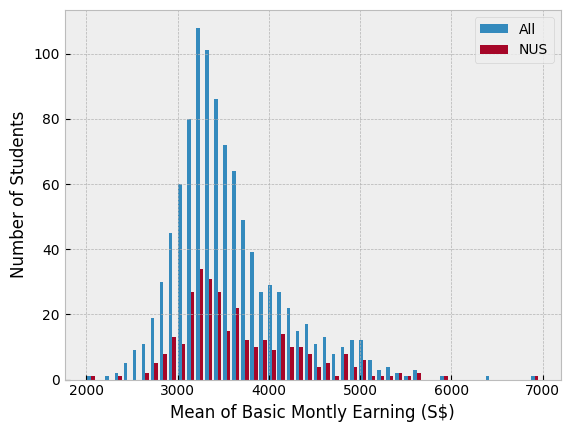

In [20]:
plt.style.use('bmh')
data = get_plot_data()

# bins specifies how many bins to split the data
plt.hist([data['All'], data['NUS']], bins=50, label=['All', 'NUS'])
plt.xlabel('Mean of Basic Montly Earning (S$)')
plt.ylabel('Number of Students')
plt.legend()

## 6.2 Scatter plots

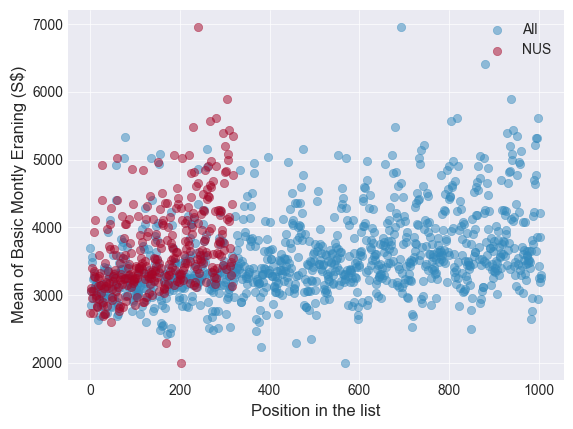

In [21]:
plt.style.use("seaborn-v0_8-darkgrid")

data = get_plot_data()

for label, numbers in data.items():
    x = range(len(numbers))
    y = numbers
    plt.scatter(x, y, label=label, alpha=.5)

plt.xlabel('Position in the list')
plt.ylabel('Mean of Basic Montly Eraning (S$)')
plt.legend()

## 6.3 Bar charts

Text(0, 0.5, 'Number of Students')

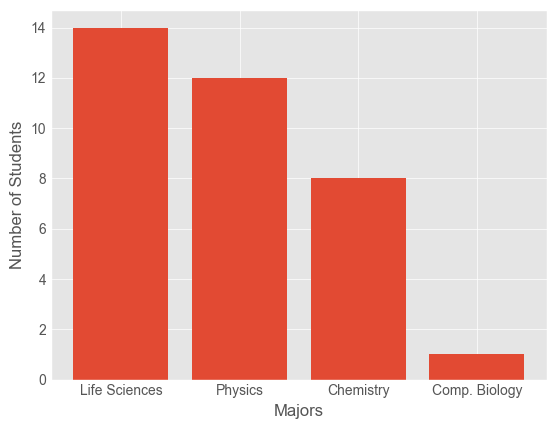

In [22]:
student_numbers = {'Life Sciences': 14,
                   'Physics': 12,
                   'Chemistry': 8,
                   'Comp. Biology': 1}
majors = list(student_numbers.keys())
numbers = list(student_numbers.values())

plt.style.use('ggplot')
plt.bar(majors, numbers)
plt.xlabel('Majors')
plt.ylabel('Number of Students')

## 6.4 Pie charts

Text(0.5, 1.0, 'Percentage of each major')

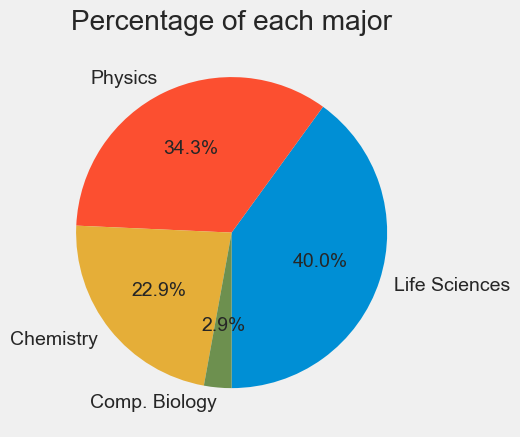

In [23]:
student_numbers = {'Life Sciences': 14,
                   'Physics': 12,
                   'Chemistry': 8,
                   'Comp. Biology': 1}
majors = list(student_numbers.keys())
numbers = list(student_numbers.values())

plt.style.use('fivethirtyeight')
plt.pie(numbers, 
        labels=majors,
        autopct='%1.1f%%',   # How to format the percentages
        startangle=-90                
        )
plt.title('Percentage of each major')